# Results for Seed 0

In [39]:
from src.utils_data import setup_experiment_rotation, unbalancing
from src.models import MnistNN, SimpleLinear 
model = SimpleLinear()
my_server, client_list  = setup_experiment_rotation(20,20,model)

In [32]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

In [40]:
my_client = client_list[1]
x_train= my_client.data['x']
y_train = my_client.data['y']

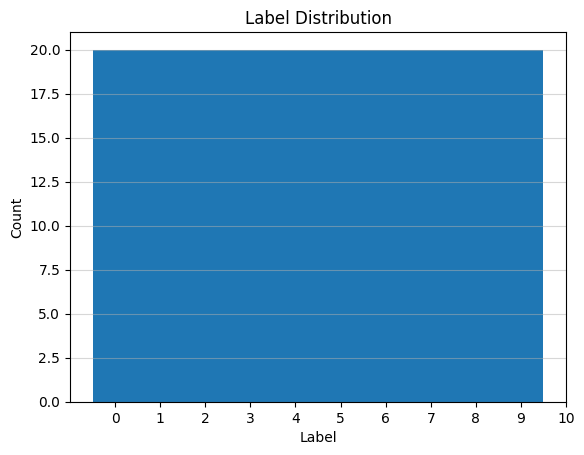

In [34]:
import matplotlib.pyplot as plt
y=y_train
plt.hist(y, bins=np.arange(min(y), 11), align='left', rwidth=1)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.xticks(np.arange(min(y), 11))
plt.grid(axis='y', alpha=0.5)
plt.show()

In [55]:
import pandas as pd 
import numpy as np
from imblearn.datasets import make_imbalance

from collections import Counter
def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}

def unbalancing(x_train, y_train,labels ,ratio):
  X_resampled = x_train.reshape(-1, 784) # flatten the images 
  y_resampled = y_train
  for i in range(len(labels)):
    X = pd.DataFrame(X_resampled)
    X_resampled, y_resampled = make_imbalance(X,
          y_resampled,
          sampling_strategy=ratio_func,
          **{"multiplier": ratio[i], "minority_class": labels[i]})
  plt.hist(y_resampled, bins=np.arange(min(y), 11), align='left', rwidth=1)
  plt.title("Ratio ")
  plt.show()
  ### RATIO 
  x_train = X_resampled.to_numpy().reshape(-1,28,28)
  y_train = y_resampled
  return x_train, y_train



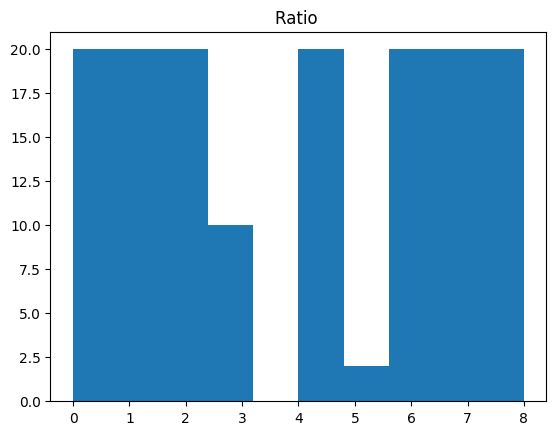

In [56]:
x,y = unbalancing(x_train, y_train, [5,3,9], [0.1,0.5,0,4])

In [52]:
x.shape

(182, 28, 28)

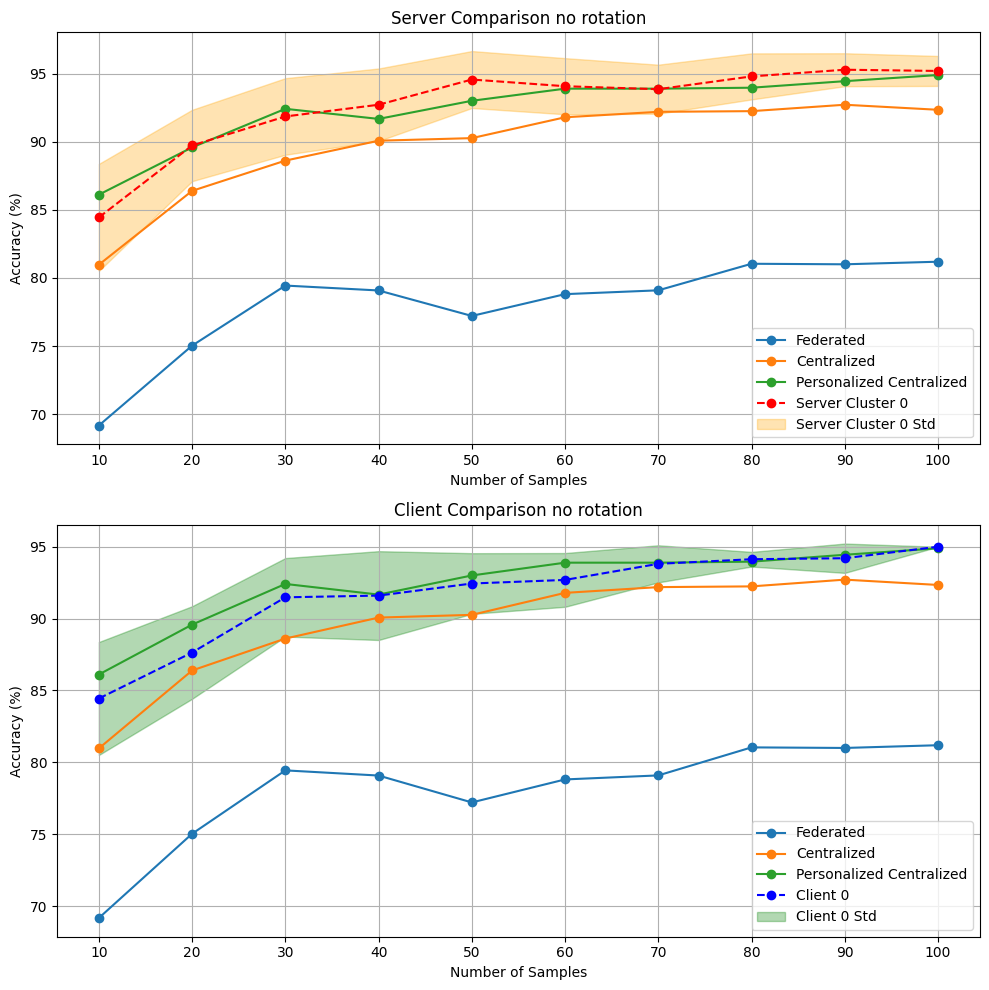

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
federated = [69.17, 75.03, 79.44, 79.08, 77.21, 78.81, 79.09, 81.04, 81.00, 81.19]
centralized = [80.97, 86.39, 88.61, 90.07, 90.26, 91.79, 92.19, 92.24, 92.71, 92.34]
centralized0 = [86.11, 89.58, 92.41, 91.67, 93.00, 93.89, 93.89, 93.96, 94.44, 94.89]
servercluster0acc = [84.44, 89.72, 91.85, 92.71, 94.56, 94.07, 93.85, 94.79, 95.28, 95.19]
servercluster0std = [3.93, 2.62, 2.81, 2.66, 2.09, 2.06, 1.80, 1.69, 1.21, 1.10]
client0acc = [84.44, 87.64, 91.48, 91.60, 92.44, 92.69, 93.81, 94.13, 94.20, 95.00]
client0std = [3.93, 3.22, 2.73, 3.09, 2.11, 1.87, 1.29, 0.51, 1.02, 0.0]  # Added one more value


# X values (assuming equal intervals)
x_values = np.arange(10, 110, 10)

# Create subplots for Server and Client
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot for Server
ax1.plot(x_values, federated, label='Federated', marker='o')
ax1.plot(x_values, centralized, label='Centralized', marker='o')
ax1.plot(x_values, centralized0, label='Personalized Centralized', marker='o')
ax1.plot(x_values, servercluster0acc, label='Server Cluster 0', marker='o', linestyle='--', color='red')
ax1.fill_between(x_values, np.array(servercluster0acc) - np.array(servercluster0std),
                 np.array(servercluster0acc) + np.array(servercluster0std),
                 alpha=0.3, color='orange', label='Server Cluster 0 Std')
ax1.set_title('Server Comparison no rotation')
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Accuracy (%)')
ax1.set_xticks(x_values)
ax1.legend()
ax1.grid(True)

# Plot for Client
ax2.plot(x_values, federated, label='Federated', marker='o')
ax2.plot(x_values, centralized, label='Centralized', marker='o')
ax2.plot(x_values, centralized0, label='Personalized Centralized', marker='o')
ax2.plot(x_values, client0acc, label='Client 0', marker='o', linestyle='--', color='blue')
ax2.fill_between(x_values, np.array(client0acc) - np.array(client0std),
                 np.array(client0acc) + np.array(client0std),
                 alpha=0.3, color='green', label='Client 0 Std')
ax2.set_title('Client Comparison no rotation')
ax2.set_xlabel('Number of Samples')
ax2.set_ylabel('Accuracy (%)')
ax2.set_xticks(x_values)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()



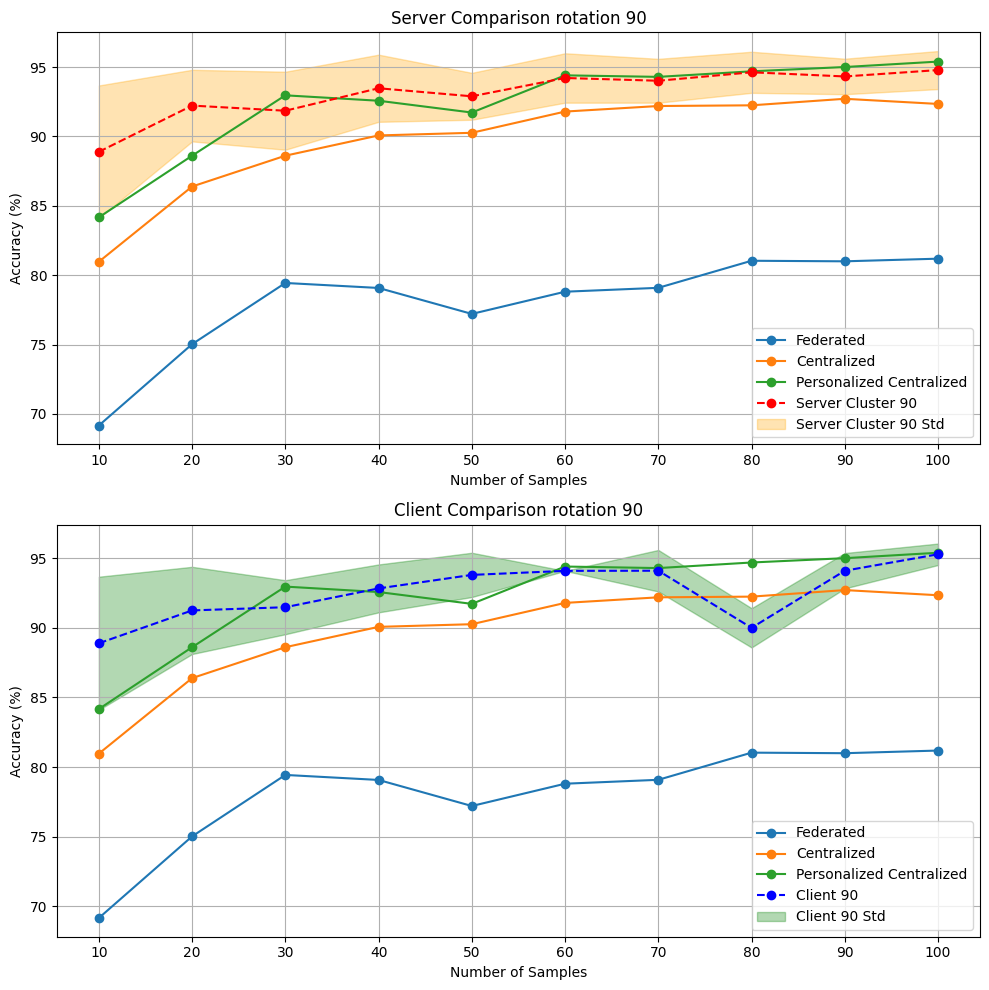

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
federated = [69.17, 75.03, 79.44, 79.08, 77.21, 78.81, 79.09, 81.04, 81.00, 81.19]
centralized = [80.97, 86.39, 88.61, 90.07, 90.26, 91.79, 92.19, 92.24, 92.71, 92.34]
centralized90= [84.17, 88.61,92.96,92.57, 91.72,94.40,94.29,94.69,95.0,95.39]
servercluster90acc = [88.89, 92.22, 91.85, 93.47, 92.89, 94.21, 94.01, 94.62, 94.32, 94.78]
servercluster90std = [4.78, 2.58, 2.81, 2.42, 1.69, 1.78, 1.58, 1.48, 1.28, 1.37]
client90acc = [88.89, 91.25, 91.48, 92.83, 93.80, 94.09, 94.10, 90, 94.10, 95.28]
client90std = [4.78, 3.13, 1.94, 1.72, 1.59, 0, 1.49, 1.41, 1.27, 0.77]

# X values (assuming equal intervals)
x_values = np.arange(10, 110, 10)

# Create subplots for Server and Client
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot for Server
ax1.plot(x_values, federated, label='Federated', marker='o')
ax1.plot(x_values, centralized, label='Centralized', marker='o')
ax1.plot(x_values, centralized90, label='Personalized Centralized', marker='o')

ax1.plot(x_values, servercluster90acc, label='Server Cluster 90', marker='o', linestyle='--', color='red')
ax1.fill_between(x_values, np.array(servercluster90acc) - np.array(servercluster90std),
                 np.array(servercluster90acc) + np.array(servercluster90std),
                 alpha=0.3, color='orange', label='Server Cluster 90 Std')
ax1.set_title('Server Comparison rotation 90')
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Accuracy (%)')
ax1.set_xticks(x_values)
ax1.legend()
ax1.grid(True)

# Plot for Client
ax2.plot(x_values, federated, label='Federated', marker='o')
ax2.plot(x_values, centralized, label='Centralized', marker='o')
ax2.plot(x_values, centralized90, label='Personalized Centralized', marker='o')

ax2.plot(x_values, client90acc, label='Client 90', marker='o', linestyle='--', color='blue')
ax2.fill_between(x_values, np.array(client90acc) - np.array(client90std),
                 np.array(client90acc) + np.array(client90std),
                 alpha=0.3, color='green', label='Client 90 Std')
ax2.set_title('Client Comparison rotation 90')
ax2.set_xlabel('Number of Samples')
ax2.set_ylabel('Accuracy (%)')
ax2.set_xticks(x_values)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


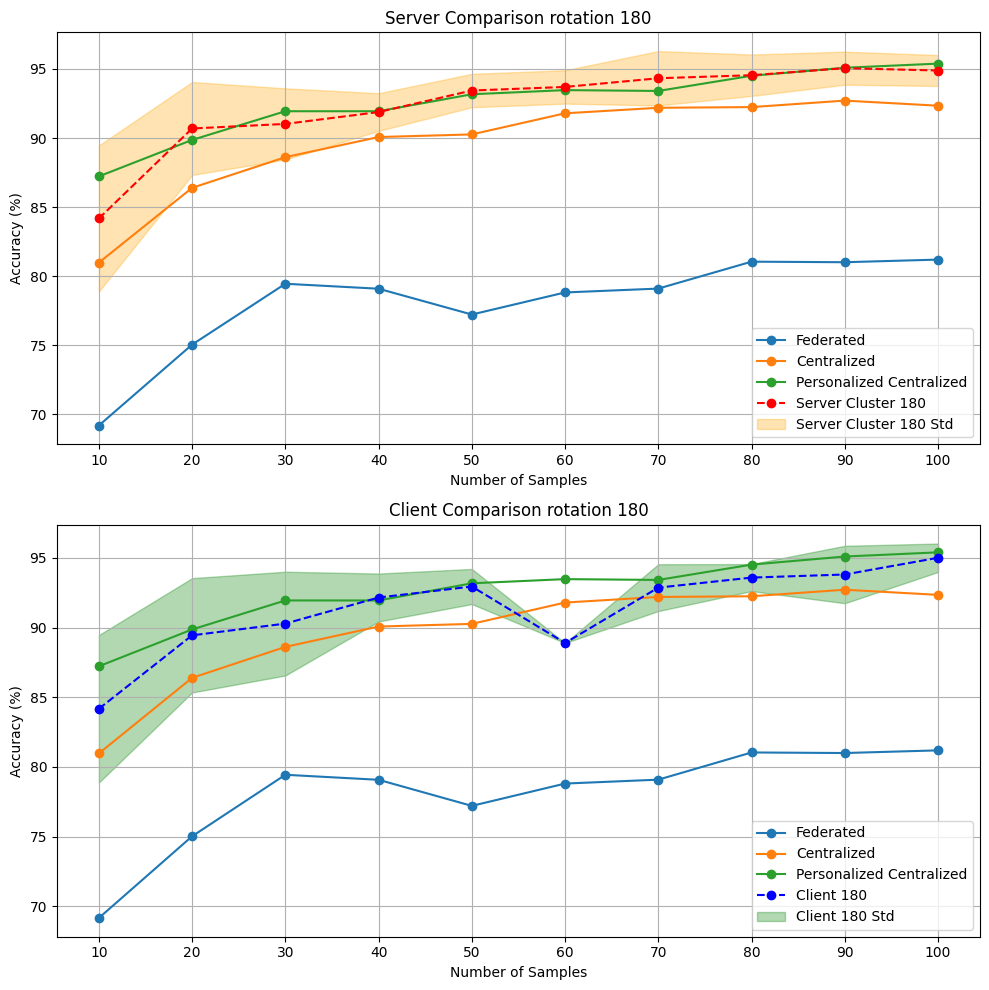

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
federated = [69.17, 75.03, 79.44, 79.08, 77.21, 78.81, 79.09, 81.04, 81.00, 81.19]
centralized = [80.97, 86.39, 88.61, 90.07, 90.26, 91.79, 92.19, 92.24, 92.71, 92.34]
centralized180 = [87.22,89.86,91.94,91.94 ,93.17,93.47,93.41,94.51,95.09,95.39]
servercluster180acc = [84.17, 90.69, 91.02, 91.88, 93.44, 93.70, 94.33, 94.55, 95.06, 94.89]
servercluster180std = [5.29, 3.37, 2.58, 1.366, 1.21, 1.21, 1.97, 1.50, 1.20, 1.12]
client180acc = [84.17, 89.44, 90.28, 92.15, 92.94, 88.89, 92.86, 93.58, 93.80, 95.00]
client180std = [5.29, 4.10, 3.72, 1.72, 1.26, 0, 1.68, 0.97, 2.06, 1.02]

# X values (assuming equal intervals)
x_values = np.arange(10, 110, 10)

# Create subplots for Server and Client
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot for Server
ax1.plot(x_values, federated, label='Federated', marker='o')
ax1.plot(x_values, centralized, label='Centralized', marker='o')
ax1.plot(x_values, centralized180, label='Personalized Centralized', marker='o')
ax1.plot(x_values, servercluster180acc, label='Server Cluster 180', marker='o', linestyle='--', color='red')
ax1.fill_between(x_values, np.array(servercluster180acc) - np.array(servercluster180std),
                 np.array(servercluster180acc) + np.array(servercluster180std),
                 alpha=0.3, color='orange', label='Server Cluster 180 Std')
ax1.set_title('Server Comparison rotation 180')
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Accuracy (%)')
ax1.set_xticks(x_values)
ax1.legend()
ax1.grid(True)

# Plot for Client
ax2.plot(x_values, federated, label='Federated', marker='o')
ax2.plot(x_values, centralized, label='Centralized', marker='o')
ax2.plot(x_values, centralized180, label='Personalized Centralized', marker='o')

ax2.plot(x_values, client180acc, label='Client 180', marker='o', linestyle='--', color='blue')
ax2.fill_between(x_values, np.array(client180acc) - np.array(client180std),
                 np.array(client180acc) + np.array(client180std),
                 alpha=0.3, color='green', label='Client 180 Std')
ax2.set_title('Client Comparison rotation 180')
ax2.set_xlabel('Number of Samples')
ax2.set_ylabel('Accuracy (%)')
ax2.set_xticks(x_values)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


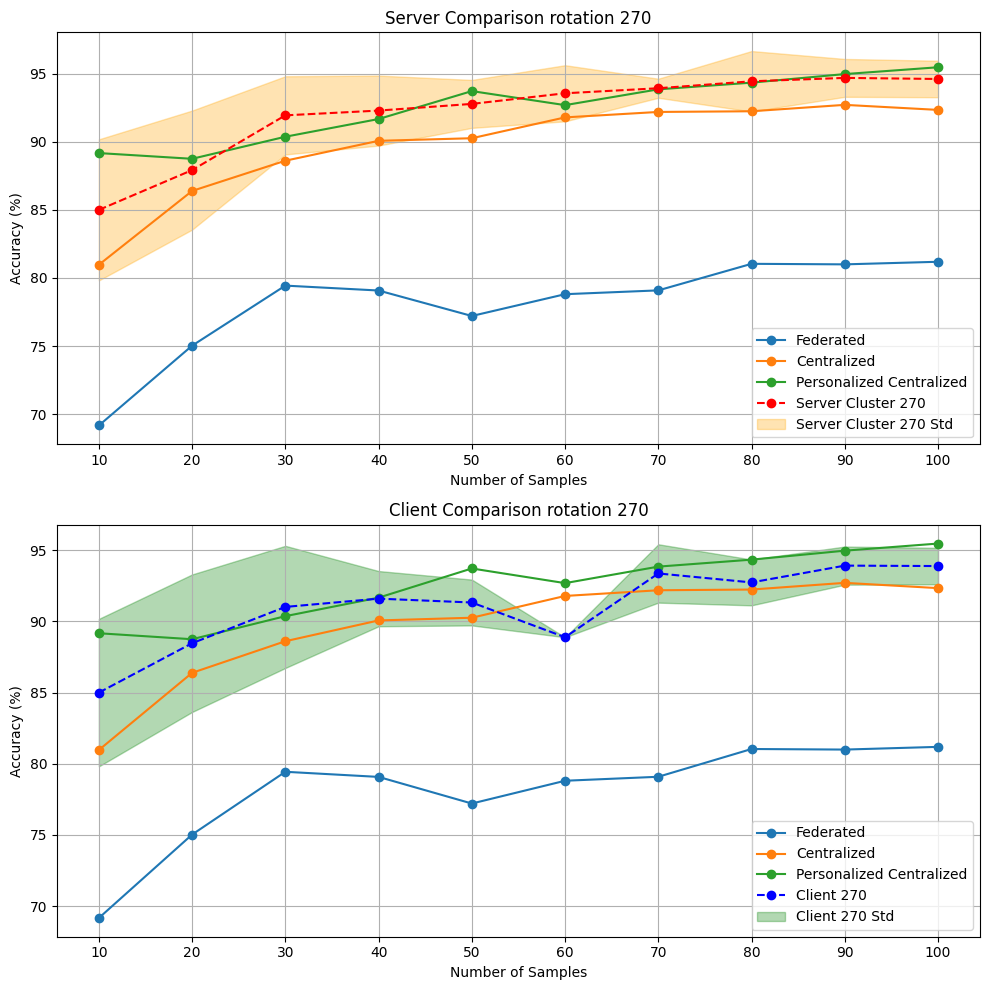

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
federated = [69.17, 75.03, 79.44, 79.08, 77.21, 78.81, 79.09, 81.04, 81.00, 81.19]
centralized = [80.97, 86.39, 88.61, 90.07, 90.26, 91.79, 92.19, 92.24, 92.71, 92.34]
centralized270 = [89.17, 88.75, 90.37, 91.67, 93.72, 92.69, 93.85, 94.34, 94.97,  95.47]
servercluster270acc = [85.00, 87.92, 91.94, 92.29, 92.78, 93.56, 93.93, 94.44, 94.69, 94.61]
servercluster270std = [5.18, 4.37, 2.87, 2.57, 1.76, 2.06, 0.70, 2.22, 1.39, 1.34]
client270acc = [85.00, 88.47, 91.02, 91.60, 91.33, 88.89, 93.37, 92.74, 93.92, 93.89]
client270std = [5.18, 4.83, 4.29, 1.94, 1.61, 0, 2.05, 1.61, 1.34, 1.28]

# X values (assuming equal intervals)
x_values = np.arange(10, 110, 10)

# Create subplots for Server and Client
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot for Server
ax1.plot(x_values, federated, label='Federated', marker='o')
ax1.plot(x_values, centralized, label='Centralized', marker='o')
ax1.plot(x_values, centralized270, label='Personalized Centralized', marker='o')

ax1.plot(x_values, servercluster270acc, label='Server Cluster 270', marker='o', linestyle='--', color='red')
ax1.fill_between(x_values, np.array(servercluster270acc) - np.array(servercluster270std),
                 np.array(servercluster270acc) + np.array(servercluster270std),
                 alpha=0.3, color='orange', label='Server Cluster 270 Std')
ax1.set_title('Server Comparison rotation 270')
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Accuracy (%)')
ax1.set_xticks(x_values)
ax1.legend()
ax1.grid(True)

# Plot for Client
ax2.plot(x_values, federated, label='Federated', marker='o')
ax2.plot(x_values, centralized, label='Centralized', marker='o')
ax2.plot(x_values, centralized270, label='Personalized Centralized', marker='o')
ax2.plot(x_values, client270acc, label='Client 270', marker='o', linestyle='--', color='blue')
ax2.fill_between(x_values, np.array(client270acc) - np.array(client270std),
                 np.array(client270acc) + np.array(client270std),
                 alpha=0.3, color='green', label='Client 270 Std')
ax2.set_title('Client Comparison rotation 270')
ax2.set_xlabel('Number of Samples')
ax2.set_ylabel('Accuracy (%)')
ax2.set_xticks(x_values)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [3]:
federated = [69.17, 75.03,79.44,79.08,77.21, 78.81,79.09, 81.04,81.00,81.19]
centralized = [80.97,86.39, 88.61,90.07,90.26,91.79,92.19,92.24,92.71, 92.34]
servercluster0acc = [84.44, 89.72, 91.85, 92.71 , 94.56, 94.07, 93.85, 94.79, 95.28, 95.19]
servercluster0std  = [3.93,2.62,2.81,2.66,2.09,2.06,1.80,1.69,1.21,1.10]

In [15]:

servercluster180acc = [84.17,90.69,91.02,91.88,93.44,93.70,94.33,94.55,95.06,94.89]
servercluster180std = [5.29,3.37,2.58,1.366,1.21,1.21,1.97,1.50,1.20,1.12]


In [14]:

servercluster180acc = [84.17,90.69,91.02,91.88,93.44,93.70,94.33,94.55,95.06,94.89]
servercluster180std = [5.29,3.37,2.58,1.366,1.21,1.21,1.97,1.50,1.20,1.12]

client180acc=[84.17,89.44,90.28,92.15,92.94,88.89,92.86,93.58,93.80,95.00]
client180std= [5.29,4.10,3.72,1.72,1.26,0,1.68,0.97,2.06,1.02]

client270acc=[85.00,88.47,91.02,91.60,91.33,88.89,93.37,92.74,93.92,93.89]
client270std = [5.18,4.83,4.29,1.94,1.61,0,2.05,1.61,1.34,1.28]


In [6]:
plt.plot()
